In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

### mnist 데이터셋 로드

In [2]:
digits = load_digits()

In [3]:
print(digits.target.shape)
print(digits.data.shape)

(1797,)
(1797, 64)


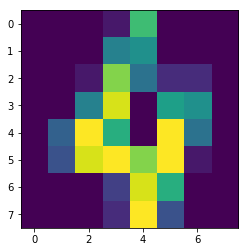

In [4]:
plt.imshow(digits.images[4])

In [5]:
W = np.random.normal(0, 1, [10, 64])
b = np.random.normal(0, 1, [10, 1])
x = digits.data.reshape([1797, 64, 1])
target = digits.target.reshape(1797, 1)
y = target.reshape([-1, 1])
learning_rate = 0.01

In [6]:
#y_hat 계산
def return_y_hat(weight=None, data=None, bias=None):
    y_hat = weight.dot(data) + bias
    return y_hat

#sigmoid 계산
def sigmoid(y, y_hat):
    difference = y_hat - y
    cost = 1 / (1+np.exp(-difference))
    return cost

#Gradient
def gradient_descent(cost, W, lr=None):
    diff_sig = cost * (1 - cost)
    W = W - (lr * diff_sig)
    return W

100th training completed
200th training completed
300th training completed
400th training completed
500th training completed
600th training completed
700th training completed
800th training completed
900th training completed


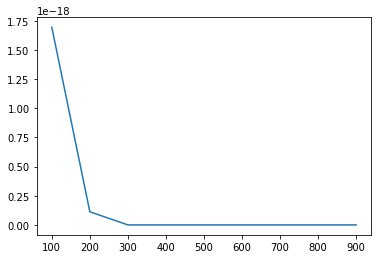

In [7]:
plot_x = []
plot_y = []

for j in range(1, 1000):
    for i in range(1, 1000):
        y_hat = return_y_hat(weight=W, data=x[i], bias=b)
        cost = sigmoid(y[i], y_hat)
        W = gradient_descent(cost, W, lr=0.01)
    if j % 100 == 0:
        print("{}th training completed".format(j))
        plot_x.append(j)
        plot_y.append(np.sum(cost))

plt.plot(plot_x, plot_y)
plt.show()

## 못하겠다 ... Scikit-learn

In [11]:
from sklearn import svm
x = digits.data.reshape([1797, 64])
target = digits.target.reshape(1797, 1)
y = target.reshape([-1, 1])

x_train, x_test = x[:1500], x[1500: -1]
y_train, y_test = y[:1500], y[1500: -1]

clf = svm.SVC()
clf.fit(x_train, y_train)

C:\Users\edte1\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf.predict(x_test)

array([5, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 5, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       5, 5, 5, 4, 5, 7, 2, 5, 5, 2, 5, 7, 9, 5, 4, 5, 5, 4, 5, 0, 5, 9,
       5, 0, 5, 2, 3, 4, 5, 5, 5, 5, 5, 0, 5, 5, 5, 4, 5, 5, 5, 0, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 4, 1, 5, 5,
       5, 5, 1, 5, 5, 5, 2, 5, 8, 5, 5, 5, 2, 5, 5, 3, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 1, 5, 5, 9, 5, 5, 5, 0, 1, 5, 5, 3, 2, 1, 5, 5, 5, 3, 1,
       5, 5, 1, 5, 5, 5, 4, 3, 1, 4, 0, 5, 3, 5, 5, 5, 1, 5, 5, 5, 5, 7,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 0, 5, 5, 5, 0, 5, 2, 5, 5, 5, 5, 7, 5,
       9, 0, 5, 5, 5, 4, 5, 6, 5, 5, 9, 5, 5, 5, 5, 4, 5, 5, 7, 5, 9, 0,
       9, 5, 5, 5, 5, 0, 9, 5, 9, 5, 5, 5, 5, 7, 3, 5, 1, 5, 5, 5, 2, 7,
       5, 2, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 9, 5, 5, 5, 9, 5,
       5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 1, 5, 9, 1, 7, 5, 5,
       4, 5, 1, 5, 5, 5, 3, 5, 5, 6, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 7,
       9, 5, 4, 5, 5, 4, 9, 0, 5, 5])

In [13]:
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

1.0
0.47297297297297297
